NSDMD Cartoon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import plotly.express as px
import plotly.graph_objects as go

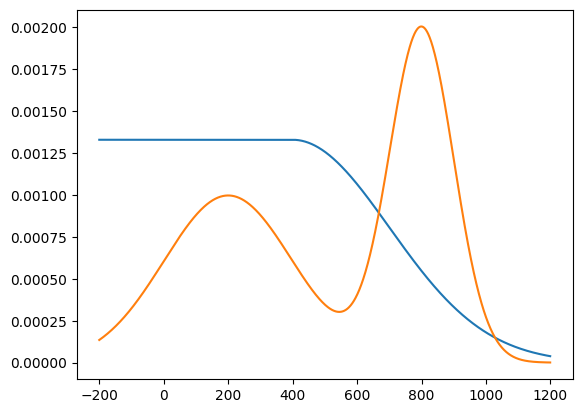

In [3]:
t = np.arange(-200,1000+200)

f1 = scipy.stats.norm.pdf(t, 400, 300)
f1[:400+200] = f1[400+200]

f2 = scipy.stats.norm.pdf(t, 800, 100)/2 + scipy.stats.norm.pdf(t, 200, 200)/2

plt.plot(t, f1)
plt.plot(t, f2)

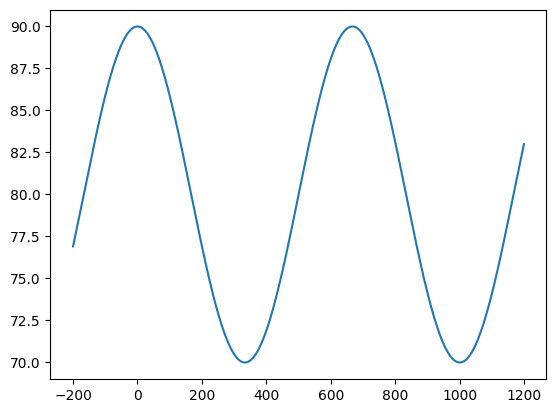

In [7]:
mu = np.cos(2*np.pi*(0.001)*1.5*t) * 10 + 80
plt.plot(t,mu)

In [8]:
x = np.arange(100)
phi1 = np.empty((100,len(mu)))
for i,m in enumerate(mu):
    temp = scipy.stats.norm.pdf(x, m, 18)
    temp /= np.sum(temp**2)**0.5
    phi1[:,i] = temp

phi2 = scipy.stats.norm.pdf(x, 40, 30)
phi2 /= np.sum(phi2**2)**0.5

print(np.sum(phi1[:,0]**2))
print(np.sum(phi2**2))

1.0
0.9999999999999999


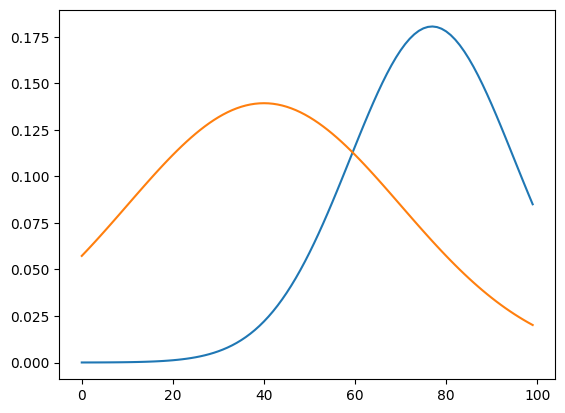

In [9]:
plt.plot(phi1[:,0])
plt.plot(phi2)

In [10]:
z1 = phi1*f1[None,:]
z2 = phi2[:,None]*f2[None,:]

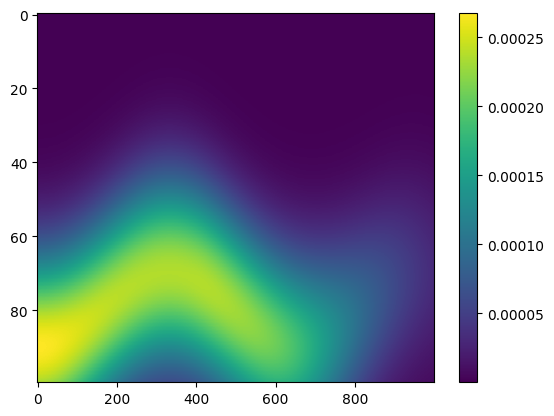

In [13]:
plt.imshow(z1[:,200:-200], aspect='auto')
plt.colorbar()

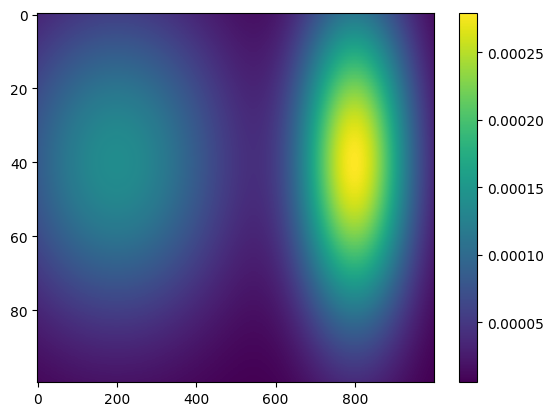

In [14]:
plt.imshow(z2[:,200:-200], aspect='auto')
plt.colorbar()

In [16]:
# colors_1= np.zeros(shape=z1.shape)    
# colors_2 = np.ones(shape=z2.shape)

# cmap = plt.get_cmap("tab10")
# colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
#               [1, 'rgb' + str(cmap(2)[0:3])]]

# fig = go.Figure(
#     data=[
#         go.Surface(
#             z=z1[:,200:-200], 
#             surfacecolor=colors_1, 
#             showscale=False,
#             opacity=0.4,
#             cmin=0,
#             cmax=1,
#             colorscale=colorscale,
#             contours = {
#                 "x": {"show": True, "start": 0, "end": 1000, "size": 70, "color":"darkred"},
#                 "y": {"show": True, "start": 0, "end": 100, "size": 8, "color":"darkred"}
#             }
#         ),
#         go.Surface(
#             z=z2[:,200:-200], 
#             surfacecolor=colors_2, 
#             showscale=False,
#             opacity=0.4,
#             cmin=0,
#             cmax=1,
#             colorscale=colorscale,
#             contours = {
#                 "x": {"show": True, "start": 0, "end": 1000, "size": 50, "color":"green"},
#                 "y": {"show": True, "start": 0, "end": 100, "size": 5, "color":"green"}
#             }
#         ),
#     ],
# )

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(showticklabels=False),
#         yaxis=dict(showticklabels=False),
#         zaxis=dict(showticklabels=False),
#         xaxis_title='time',
#         yaxis_title='space',
#         zaxis_title='|Φ| x f(t)',
#     ),
#     width=1100,
#     height=1100,
# )
# fig.update_layout(
#     font=dict(
#         size=30
#     )
# )

# camera = dict(
#     up=dict(x=0, y=0, z=1),
#     center=dict(x=0, y=0, z=0),
#     eye=dict(x=-1.65, y=-0.85, z=1.15)
# )

# fig.update_layout(scene_camera=camera)


# fig.show()

### Define complete data matrix

In [20]:
sr = 1000

t_true = t / sr

In [21]:
z1.shape

(100, 1400)

In [22]:
f1 = 20
f2 = 30

phase_offset = np.pi/4

wav1 = np.cos(2*np.pi*f1*t_true)
wav2 = np.cos(2*np.pi*f2*t_true+phase_offset)

In [23]:
x = z1*wav1[None,:] + z2*wav2[None,:]

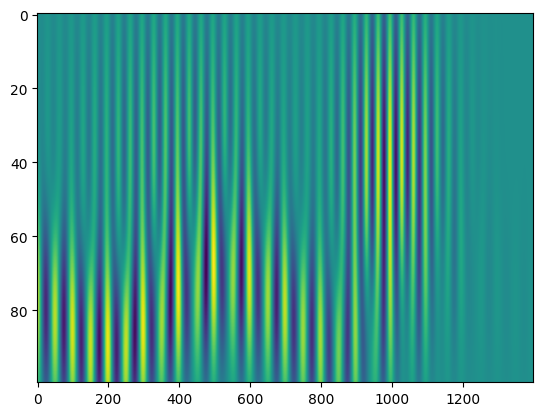

In [24]:
plt.imshow(x, aspect='auto')

### Applying NS-DMD

In [25]:
from nsdmd import utils
from nsdmd import nsdmd

Text(0, 0.5, 'PSD')

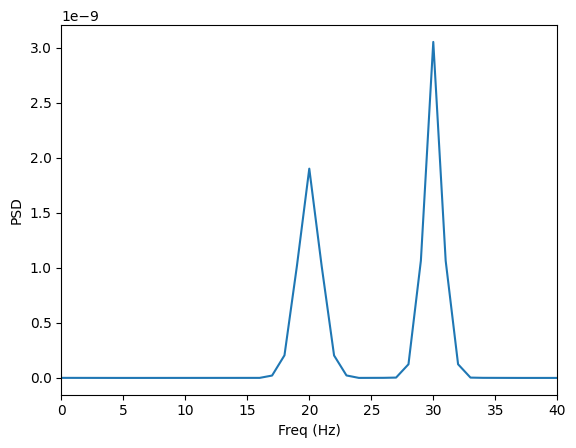

In [26]:
psd_f, psd_p = scipy.signal.welch(x[50], fs=sr, nperseg=1000)
plt.plot(psd_f, psd_p)
plt.xlim(0,40)
plt.xlabel('Freq (Hz)')
plt.ylabel('PSD')

In [53]:
model = nsdmd.NSDMD(opt_rank=4, opt_stride=25, opt_win=200, verbose=True, 
                    sim_thresh_freq=0.5, sim_thresh_phi_amp=0.9, sim_thresh_phi_phase=10, grad_alpha=0, grad_beta=0, grad_N=20)

In [54]:
model.fit(x, t_true+0.2, sr, initial_freq_guess=np.array([20,-20,30,-30]))

Starting OPT-DMD...
Gathering modes...
Found 2 modes
Number of modes: 2/2, stopping at 0
Number of modes: 1/2, stopping at 0
Guessing 2 number of modes


In [55]:
f, phi = model.get_freq_and_phi(len(t_true), sr)

In [56]:
f_hat = model.f_hat_

In [57]:
f_hat

array([[1.27190182e-03, 1.27190182e-03, 1.27190182e-03, ...,
        1.89536191e-05, 1.89536191e-05, 1.89536191e-05],
       [1.88656051e-04, 1.88656051e-04, 1.88656051e-04, ...,
        7.77047171e-06, 7.77047171e-06, 7.77047171e-06]])

In [58]:
z1_n = (np.abs(phi[0]) * f_hat[0][:,None]).T
z2_n = (np.abs(phi[1]) * f_hat[1][:,None]).T

In [60]:
# colors_1= np.zeros(shape=z1.shape)    
# colors_2 = np.ones(shape=z2.shape)

# cmap = plt.get_cmap("tab10")
# colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
#               [1, 'rgb' + str(cmap(2)[0:3])]]

# fig = go.Figure(
#     data=[
#         go.Surface(
#             z=z1_n[:,200:-200], 
#             surfacecolor=colors_1, 
#             showscale=False,
#             opacity=0.4,
#             cmin=0,
#             cmax=1,
#             colorscale=colorscale,
#             contours = {
#                 "x": {"show": True, "start": 0, "end": 1000, "size": 70, "color":"darkred"},
#                 "y": {"show": True, "start": 0, "end": 100, "size": 8, "color":"darkred"}
#             }
#         ),
#         go.Surface(
#             z=z2_n[:,200:-200], 
#             surfacecolor=colors_2, 
#             showscale=False,
#             opacity=0.4,
#             cmin=0,
#             cmax=1,
#             colorscale=colorscale,
#             contours = {
#                 "x": {"show": True, "start": 0, "end": 1000, "size": 50, "color":"green"},
#                 "y": {"show": True, "start": 0, "end": 100, "size": 5, "color":"green"}
#             }
#         ),
#     ],
# )

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(showticklabels=False),
#         yaxis=dict(showticklabels=False),
#         zaxis=dict(showticklabels=False),
#         xaxis_title='time',
#         yaxis_title='space',
#         zaxis_title='|Φ| x f(t)',
#     ),
#     width=1100,
#     height=1100,
# )
# fig.update_layout(
#     font=dict(
#         size=30
#     )
# )

# camera = dict(
#     up=dict(x=0, y=0, z=1),
#     center=dict(x=0, y=0, z=0),
#     eye=dict(x=-1.65, y=-0.85, z=1.45)
# )

# fig.update_layout(scene_camera=camera)

# fig.show()

### Reconstruct with OPT-DMD

In [61]:
temp = nsdmd.optdmd.OptDMD(x, t_true+0.2, 4)
temp.fit(verbose=False, eigs_guess=0.0 + 1j * 2 * np.pi * np.array([20,-20,30,-30]))

In [62]:
np.array(temp.eigs).imag / 2.0 / np.pi

array([ 20.00061438, -20.00061438,  29.99917506, -29.99917506])

In [63]:
temporaldynamics = np.exp(np.outer(np.real(temp.omega), temp.timesteps - temp.timesteps[0])) * temp.amplitudes[:, None]

In [64]:
z1_o = np.abs(temp.modes[:,:2] @ temporaldynamics[:2])
z2_o = np.abs(temp.modes[:,2:] @ temporaldynamics[2:])

In [67]:
# colors_1= np.zeros(shape=z1.shape)    
# colors_2 = np.ones(shape=z2.shape)

# cmap = plt.get_cmap("tab10")
# colorscale = [[0, 'rgb' + str(cmap(1)[0:3])], 
#               [1, 'rgb' + str(cmap(2)[0:3])]]

# fig = go.Figure(
#     data=[
#         go.Surface(
#             z=z1_o[:,200:-200], 
#             surfacecolor=colors_1, 
#             showscale=False,
#             opacity=0.4,
#             cmin=0,
#             cmax=1,
#             colorscale=colorscale,
#             contours = {
#                 "x": {"show": True, "start": 0, "end": 1000, "size": 70, "color":"darkred"},
#                 "y": {"show": True, "start": 0, "end": 100, "size": 8, "color":"darkred"}
#             }
#         ),
#         go.Surface(
#             z=z2_o[:,200:-200], 
#             surfacecolor=colors_2, 
#             showscale=False,
#             opacity=0.4,
#             cmin=0,
#             cmax=1,
#             colorscale=colorscale,
#             contours = {
#                 "x": {"show": True, "start": 0, "end": 1000, "size": 50, "color":"green"},
#                 "y": {"show": True, "start": 0, "end": 100, "size": 5, "color":"green"}
#             }
#         ),
#     ],
# )

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(showticklabels=False),
#         yaxis=dict(showticklabels=False),
#         zaxis=dict(showticklabels=False),
#         xaxis_title='time',
#         yaxis_title='space',
#         zaxis_title='|Φ x b x exp(Re(λ))|',
#     ),
#     width=1100,
#     height=1100,
# )
# fig.update_layout(
#     font=dict(
#         size=30
#     )
# )

# camera = dict(
#     up=dict(x=0, y=0, z=1),
#     center=dict(x=0, y=0, z=0),
#     eye=dict(x=-1.65, y=-0.85, z=1.45)
# )

# fig.update_layout(scene_camera=camera)


# fig.show()